## Introduction to Statistical Testing
You did it! You made it to week four. We've saved one of the best (and hardest) lessons for last. This lesson will cover statistical testing within Jupyter Notebooks. 

![](https://media.giphy.com/media/TN0irsCox4F2nifYXC/giphy.gif)

## Importing Packages
Let's go ahead and import the necessary packages. Again, we'll go ahead and import Numpy and Pandas. This time around, we'll also be importing **SciPy**. Speficically, we'll be importing the **subpackage** stats from SciPy. All a subpackage is is a package within another package. We'll import the SciPy package, and you can try importing Pandas and Matplotlib yourself below. 

### SciPy
SciPy, short for Scientific Python is a package that allows us to use scientific and mathematic tools for working with data. It works extremely well with Pandas and NumPy since it was created by the same developers. 

In [1]:
from scipy import stats 

# TODO: Import pandas (with the alias pd)
import pandas as pd

# TODO: Import matplotlib's pyploy (with the alias plt)
import matplotlib.pyplot as plt

%matplotlib inline

This block below ensures whenever and wherever we run the code, the same random numbers are generated regardless. Be sure to check out the video below if you'd like to learn more about what this package, and random number generators in general, do. 

In [3]:
%%html
`<iframe width="560" height="315" src="https://www.youtube.com/embed/GtOt7EBNEwQ" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>`

In [2]:
import random
random.seed(123456)

## Getting our Data
Again, we'll be working with the DSNY NEON site data.

In [4]:
data = pd.read_csv('../data/dsny_data.csv')

## Mean Tests

In [6]:
# TODO: Examine first five values in the New York dataframe
data.head()

,time,temperature_mean,temperature_minimum,temperature_maximum,temperature_variance,relative_humidity_mean,relative_humidity_minimum,relative_humidity_maximum,relative_humidity_variance,CO2_flux,H2O_flux,precipitation_bulk
0,2018-02-22T18:00:00Z,NaN,NaN,NaN,NaN,51.49,51.08,52.26,0.08,NaN,NaN,0.0
1,2018-02-22T18:30:00Z,NaN,NaN,NaN,NaN,50.69,49.34,53.23,0.64,NaN,NaN,0.0
2,2018-02-22T19:00:00Z,NaN,NaN,NaN,NaN,48.60,44.94,52.10,3.84,NaN,NaN,0.0
3,2018-02-22T19:30:00Z,NaN,NaN,NaN,NaN,46.35,44.59,48.69,0.81,NaN,NaN,0.0
4,2018-02-22T20:00:00Z,NaN,NaN,NaN,NaN,50.23,46.44,52.52,2.82,NaN,NaN,0.0


The first thing we would need to determine, is whether or not our variation in data is due to random chance.The way statisticians quantify this variation is through **mean tests**. Mean tests measure whether or not the results we see are **statistically significant** or simply due to **chance error**. The way they do this is by measuring the probability of getting our results under the assumptions we have made with our data.

Let's use a Histogram to look at how our data is distributed, for the temperatures throughout the month of June in 2020. We'll also use a special method called `dropna()` to drop values that are missing from our data. 

In [51]:
june_data = data.loc[(data['time'] > '2020-05-31') & (data['time'] <= '2020-06-30')]
june_data = june_data.dropna(subset=['temperature_mean'])

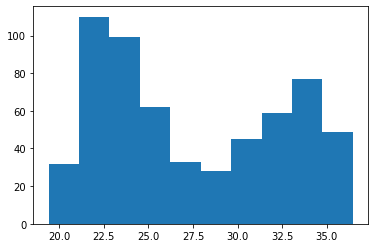

In [52]:
# TODO: Make a histogram of the June mean temperatures
plt.hist(june_data['temperature_mean'])
plt.show()

We'll also repeat this for the month of December

In [53]:
december_data = data.loc[(data['time'] > '2020-11-30') & (data['time'] <= '2020-12-31')]
december_data = december_data.dropna(subset=['temperature_mean'])

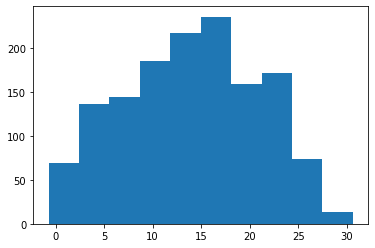

In [54]:
# TODO: Make a histogram of the December mean temperatures
plt.hist(december_data['temperature_mean'])
plt.show()

We can now use a **T-test** to examine whether there is a **statistically significant** difference in the mean temperatures for the two time frames besides simply looking at a histogram. T-tests take into account the mean and the variance of two variables to determine whether they are similar or different. Running a T-test gives us a **P-value** which is the probability that we got this value from random chance.

First, let's look at the mean mean temperatures for December and June 2020 (hehe, mean mean).

In [55]:
# TODO: Get the mean daily deaths in New York
june_data['temperature_mean'].mean()

27.440420033670033

In [56]:
# TODO: Get the mean daily deaths in New York
december_data['temperature_mean'].mean()

13.957019318181828

Based on the histograms and the means that we calculated, we can begin to believe that there is a significant difference between the distribution of mean temperatures throughout the months of December and June. We can further support our inference by usings using the `stats.ttest_ind` method to conduct and independent t-test on our two data columns. 

**NOTE** you may have noticed the `equal_var=False` argument set below. This has to do with the **variance** of our data. Though we won't go much into the variance represents, you can think of it as describing how spread out our data is. As we can see from the histogram above, our data is not equally spread out, and thus, our data does not have equal variances. 

In [57]:
stats.ttest_ind(june_data['temperature_mean'], december_data['temperature_mean'], equal_var=False)[1]

6.09863278353e-313

With this p-value, we can safetly assume that there is a significant difference between the mean temperature in the months of June and December

## Correlation Test

The last type of statistical testing that we'll cover today is the **Correlation Test**. This allows us to see how much of a relationship two data columns have. However, data can have many forms of correlation. The most typical correlationship that is tested for is a **Linear Relationship**. Don't worry about the code itself for now, just take a look at the data itself.

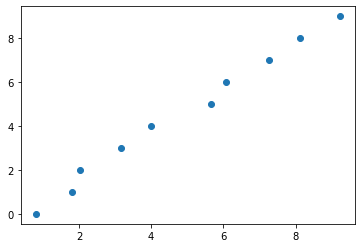

In [24]:
X = [x + random.random() for x in range(10)]
Y = [y for y in range(10)]
plt.scatter(X, Y)
plt.show()

As you can see, our data forms what appears to be a line. The line is also pointing upward, which suggests a **positive correlation** between the x and y data. A positive correlation means that when one variable increases, the other variable is expected to increase as well. We can view this by plotting the line \$y = x\$ over our data.

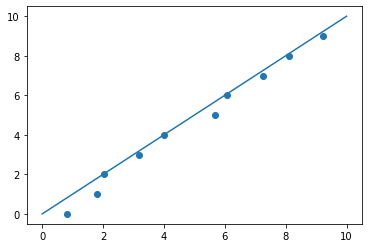

In [25]:
plt.plot([0,10],[0,10])
plt.scatter(X, Y)
plt.show()

As you can see, the points that we plotted fall very close to the line. Next, we'll check out what is called a **negative correlation**. A negative correlation means that when one variable increases, we expect the other variable to decrease. Again, don't worry as much about the code than the plot itself.

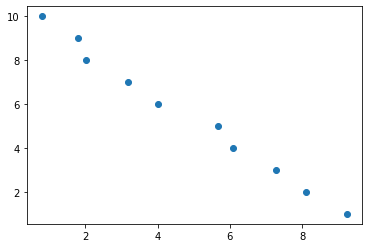

In [26]:
plt.scatter(X, [10 - y for y in Y])
plt.show()

When plot this data with the line \$ y = -x + 10 \$ through it, we can better see the negative relationship in the data.

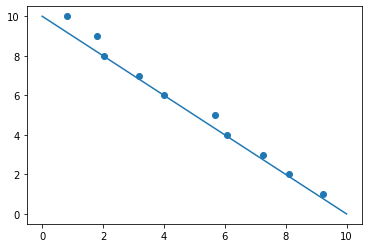

In [27]:
plt.scatter(X, [10 - y for y in Y])
plt.plot([0,10], [10,0])
plt.show()

We have ways to compare different types of correlations. The most common on you will is the called the **Pearson Correlation Coefficient** which simply measures how strong of a linear relationship two variables have. Another way to think of this correlation coefficient as being related to the slope of the line of best fit.<br> A perfect, positive linear relationship would result in a **Correlation Coefficient** of 1, whereas a perfect negative linear relationship would result in a correlation coefficient of -1.

Looking at the data above, we can see that the first graph is very strongly linearly correlated and we would expect a correlation coefficient closer to 1. In the second graph, they are negatively correlated so correlation coefficient is going to be close to -1. Because the absolute value of our coefficients are close to 1, we could say that our data is **strongly linearly correlated**. This means a linear pattern describes our data well. However, if we had data such as below, we would say that our correlation coefficient is small and close to 0. Therefore, we would say that our data has a **weak linear correlation**. 

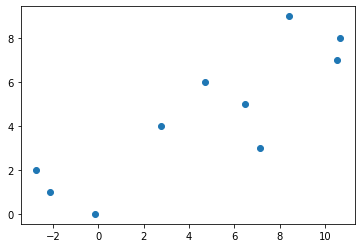

In [28]:
plt.scatter([x+10 * (random.random()-.5) for x in range(10)] , Y)
plt.show()

We can see if there's a correlation between the humidity and precipitation at the DSNY NEON Site.

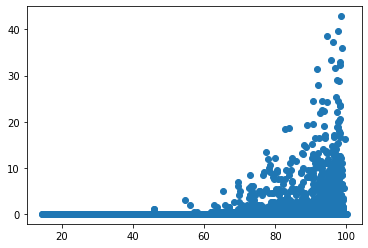

In [66]:
# TODO: Plot mean relative humidity versus bulk precipitation
plt.scatter(data['relative_humidity_mean'], data['precipitation_bulk'])
plt.show()

Fortunately, Pandas already has a `corr()` method built in, so we don't even have to bother with using SciPy for this case.

In [69]:
data['relative_humidity_mean'].corr(data['precipitation_bulk'], method='pearson')

0.07646991489327266

As you can see, we got a correlation coefficient of 0.07. This is close to zero, which suggests that there is a very weak linear relationship between these data. This is evident in our plot above, so no surprises here. Next, we'll try a **Spearman Correlation**, which simply measures how related two data points are. The benefit of using the Spearman Correlation is that the data doesn't have to be linear, all it has to have is some form of a relationship that follows a line or a curve. 

In [70]:
data['relative_humidity_mean'].corr(data['precipitation_bulk'], method='spearman')

0.15637069864671663

As expected, we get a stronger correlation value since our data is not linear.

# Practice
That was our last and hardest lesson yet, so props for making it through the course! Let's go ahead and practice the skills and techniques we learned today.

### Question One
Let's determine if there's any correlation between the total number of people hospitalized, and the total number of people recovered in New York. This problem is three-fold: First, we'll create a scatterplot of our data to view the number of people hospitalized versus the number of people recovered for each date. Then, we'll go ahead and conduct both a Pearson and a Spearman Correlation.

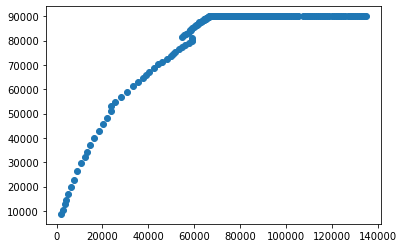

In [8]:
# TODO: Create a scatterplot of recovered patients and hospitalized patients in New York
# *Hint*: We want to see the cumulative hospitalizations, not the daily hospitalizations
plt.scatter(new_york_data['recovered'], new_york_data['hospitalizedCumulative'])

In [9]:
# TODO: Calculate the Pearson correlation between recovered and hospitalized individuals 
# in New York


In [11]:
# TODO: Calculate the Spearman correlation between recovered and hospitalized individuals 
# in New York


### Question Two
Let's see if the mean number of tests issued between Florida and New York differ. This problem is three-fold: First, we'll create a histogram of our data to view the distribution of tests issued each day. Then, we'll go ahead and compute a t-test to see how the distributions of these data compare. 

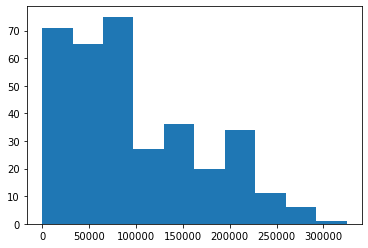

In [15]:
# TODO: Create a histogram of the New York daily tests issued 
plt.hist(new_york_data['totalTestResultsIncrease'])
plt.show()

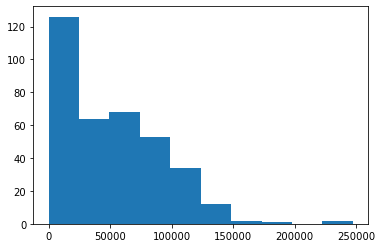

In [16]:
# TODO: Create a histogram of the Florida daily tests issued 
plt.hist(florida_data['totalTestResultsIncrease'])
plt.show()

In [17]:
# TODO: Perform a T-test to compare the mean values of tests issued in
# each state. Ensure to compute an independent T-test, and assume that 
# these distributions don't have the same variance
stats.ttest_ind(new_york_data['totalTestResultsIncrease'], florida_data['totalTestResultsIncrease'], equal_var=False)[1]

2.2799111426504386e-24